# Aufgabe 1 (2P)
Laden Sie den Datensatz „rawdata_luftqualitaet.csv“ in einen DataFrame. Skalieren Sie die Daten mit dem StandardScaler. Trennen Sie die
Daten in einen Lern- und Testdatensatz zur Classification des Labels "state_air_quality" mit den 3 Klassen 0, 1 und 2. Nutzen Sie alle 5
Merkmale 'humidity_inside','temperature_inside','co2_inside','temperature_heater‘ und 'temperature_wall_inside‘ im Training.

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('rawdata_luftqualitaet.csv')

X = df[df.columns[:-1]]
y = df['state_air_quality']

# Validation data to calculate the loss and accuracy in every epoch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=12)

# standardize training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen. (1P)

<img src="images/1a.png" width="600">

In [51]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units=60, input_shape=(5,), activation='relu', name='dense_9'))
model.add(Dense(units=60, activation='relu', name='dense_10'))
model.add(Dense(units=3, activation='softmax', name='dense_11_output'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# overview of model
model.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11_output (Dense)         │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess mit „Overfitting“ ähnlich wie unten in der
Abbildung (1P)

<img src="images/1b.png" width="600">

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8033 - loss: 0.6451 - val_accuracy: 0.8641 - val_loss: 0.4578
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.4013 - val_accuracy: 0.9076 - val_loss: 0.3492
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9003 - loss: 0.3152 - val_accuracy: 0.9076 - val_loss: 0.2921
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9085 - loss: 0.2608 - val_accuracy: 0.9130 - val_loss: 0.2421
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9153 - loss: 0.2193 - val_accuracy: 0.9185 - val_loss: 0.2102
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9235 - loss: 0.1882 - val_accuracy: 0.9293 - val_loss: 0.1820
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9358 - loss: 0.1642 - val_accuracy: 0.9402 - val_loss: 0.1709
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.1439 - val_accuracy: 0.9402 - v

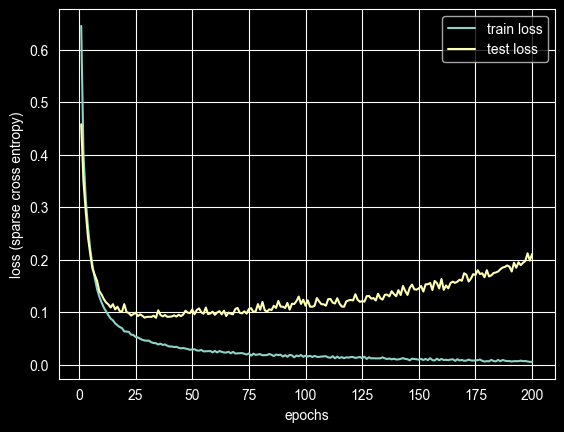

In [52]:
epochs = 200

# Overfitting Fehler(Train) < Fehler(Test)

# training model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)

accuracy_train = history.history['accuracy']
loss_train = history.history['loss']
loss_test = history.history['val_loss']

epochs_axis = range(1, len(accuracy_train)+1)

plt.plot(epochs_axis, loss_train, label='train loss')
plt.plot(epochs_axis, loss_test, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss (sparse cross entropy)')
plt.legend()
plt.show()

---
# Aufgabe 2 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Fügen Sie dieses Mal
Callbacks für ein EarlyStopping ein. (1P)

In [53]:
from tensorflow.keras.callbacks import (EarlyStopping, ModelCheckpoint)

# stop at no improvements after 5 epochs
stopping = EarlyStopping(monitor='val_loss', patience=5)

# store the best model
checkpoint = ModelCheckpoint(filepath='keras_test_model.h5', monitor='val_loss',save_best_only=True)

model = Sequential()
model.add(Dense(units=60, input_shape=(5,), activation='relu', name='dense_9'))
model.add(Dense(units=60, activation='relu', name='dense_10'))
model.add(Dense(units=3, activation='softmax', name='dense_11_output'))

# loss for classification of 3 classes
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# overview of the model
model.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11_output (Dense)         │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen sowie den definierten Callbacks und visualisieren Sie den Anlernprozess erneut,
ähnlich wie unten, je nach nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die
callbacks zu vermeiden. (1P)

<img src="images/2b.png" width="600">

Epoch 1/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step - accuracy: 0.4062 - loss: 1.0419

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7951 - loss: 0.6652 - val_accuracy: 0.8207 - val_loss: 0.4959
Epoch 2/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8125 - loss: 0.4972

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8374 - loss: 0.4394 - val_accuracy: 0.8750 - val_loss: 0.3877
Epoch 3/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.2635

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8866 - loss: 0.3505 - val_accuracy: 0.8967 - val_loss: 0.3261
Epoch 4/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8438 - loss: 0.4025

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8975 - loss: 0.2924 - val_accuracy: 0.8967 - val_loss: 0.2801
Epoch 5/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.2431

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9071 - loss: 0.2493 - val_accuracy: 0.9076 - val_loss: 0.2389
Epoch 6/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9062 - loss: 0.2063

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 0.2142 - val_accuracy: 0.9239 - val_loss: 0.2130
Epoch 7/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8750 - loss: 0.2258

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9249 - loss: 0.1861 - val_accuracy: 0.9185 - val_loss: 0.1957
Epoch 8/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9375 - loss: 0.1359

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9440 - loss: 0.1635 - val_accuracy: 0.9511 - val_loss: 0.1674
Epoch 9/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.1287

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9522 - loss: 0.1416 - val_accuracy: 0.9402 - val_loss: 0.1519
Epoch 10/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.1205

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: 0.1282 - val_accuracy: 0.9402 - val_loss: 0.1463
Epoch 11/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.1026

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9658 - loss: 0.1155 - val_accuracy: 0.9457 - val_loss: 0.1383
Epoch 12/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0525

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9617 - loss: 0.1066 - val_accuracy: 0.9565 - val_loss: 0.1261
Epoch 13/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9688 - loss: 0.1276

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0960 - val_accuracy: 0.9511 - val_loss: 0.1202
Epoch 14/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0423

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9658 - loss: 0.0929 - val_accuracy: 0.9565 - val_loss: 0.1150
Epoch 15/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9688 - loss: 0.1125

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.0870 - val_accuracy: 0.9511 - val_loss: 0.1141
Epoch 16/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.1096

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.0824 - val_accuracy: 0.9620 - val_loss: 0.1094
Epoch 17/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0784 - val_accuracy: 0.9511 - val_loss: 0.1117
Epoch 18/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.0728 - val_accuracy: 0.9457 - val_loss: 0.1147
Epoch 19/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9781 - loss: 0.0666 - val_accuracy: 0.9565 - val_loss: 0.1118
Epoch 20/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0519

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0686 - val_accuracy: 0.9620 - val_loss: 0.1023
Epoch 21/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.0622 - val_accuracy: 0.9511 - val_loss: 0.1053
Epoch 22/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9781 - loss: 0.0617 - val_accuracy: 0.9565 - val_loss: 0.1036
Epoch 23/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9688 - loss: 0.0790

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9781 - loss: 0.0598 - val_accuracy: 0.9565 - val_loss: 0.0977
Epoch 24/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0555 - val_accuracy: 0.9565 - val_loss: 0.1021
Epoch 25/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.0559 - val_accuracy: 0.9511 - val_loss: 0.1071
Epoch 26/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.9620 - val_loss: 0.0979
Epoch 27/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9375 - loss: 0.1132

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9836 - loss: 0.0525 - val_accuracy: 0.9620 - val_loss: 0.0968
Epoch 28/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0391

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9822 - loss: 0.0498 - val_accuracy: 0.9620 - val_loss: 0.0958
Epoch 29/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0490 - val_accuracy: 0.9620 - val_loss: 0.0983
Epoch 30/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0379

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0454 - val_accuracy: 0.9620 - val_loss: 0.0954
Epoch 31/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0452 - val_accuracy: 0.9620 - val_loss: 0.0968
Epoch 32/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0441 - val_accuracy: 0.9620 - val_loss: 0.1001
Epoch 33/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0404

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0435 - val_accuracy: 0.9620 - val_loss: 0.0947
Epoch 34/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.9565 - val_loss: 0.1058
Epoch 35/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.0399 - val_accuracy: 0.9565 - val_loss: 0.1042
Epoch 36/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9904 - loss: 0.0402 - val_accuracy: 0.9620 - val_loss: 0.0959
Epoch 37/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0392 - val_accuracy: 0.9620 - val_loss: 0.0958
Epoch 38/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0375 - val_accuracy: 0.9620 - val_loss: 0.0959


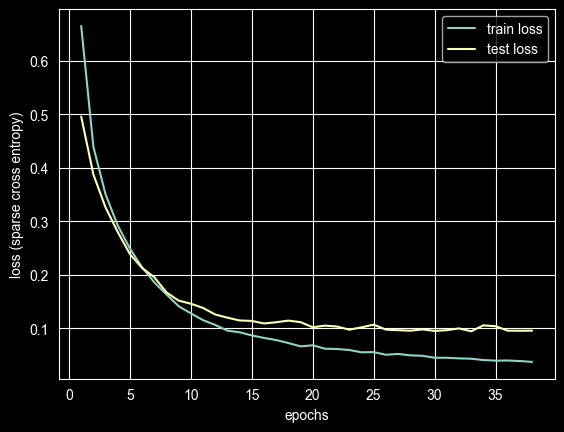

In [54]:
epochs = 200

# train model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,validation_data=(X_test, y_test), callbacks=[stopping, checkpoint],verbose=1)

accuracy_train = history.history['accuracy']
loss_train = history.history['loss']
loss_test = history.history['val_loss']

epochs_axis = range(1, len(accuracy_train)+1)

plt.plot(epochs_axis, loss_train, label='train loss')
plt.plot(epochs_axis, loss_test, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss (sparse cross entropy)')
plt.legend()
plt.show()

---
# Aufgabe 3 (2P)
Nutzen Sie den gleichen Lern- und Testdatensatz wie in Aufgabe 1 und 2.

## a)
Erstellen Sie ein sequenzielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen wie in Aufgabe 1a. Nutzen Sie dieses Mal
die Methode der L2-Regularisierung ohne Callbacks, um eine Überanpassung zu vermeiden. (1P)

In [59]:
from tensorflow.keras.regularizers import l2

# punishment for too big weights
reg = l2(l2=.008)

model_reg = Sequential()

# kernel_regularizer = reg in order to regularize this layer
model_reg.add(Dense(units=60, input_shape=(5,),activation='relu',kernel_regularizer=reg))
model_reg.add(Dense(units=60, activation='relu',kernel_regularizer=reg))
model_reg.add(Dense(units=3, activation='softmax',
kernel_regularizer=reg))
model_reg.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_reg.summary()

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 60)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 60)             │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

## b)
Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess erneut, ähnlich wie unten, je nach
nachdem wie bei Ihnen der Prozess verlaufen ist, bemühen Sie sich darum, das Overfitting durch die Regularisierung zu vermeiden.
(1P)

<img src="images/3b.png" width="600">

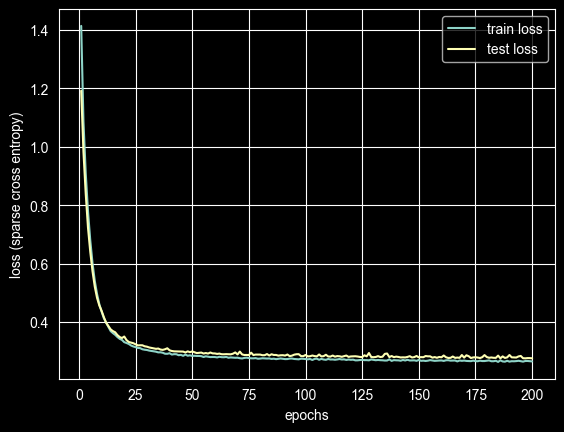

In [60]:
epochs = 200
batch_size = 32
history = model_reg.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test), verbose=False)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_axis = range(1, len(loss)+1)
plt.plot(epochs_axis, loss, label='train loss')
plt.plot(epochs_axis, val_loss, label='test loss')
plt.xlabel('epochs')
plt.ylabel('loss (sparse cross entropy)')
plt.legend()